# Simple Attitude

In [1]:
import sys

In [2]:
for _ in range(2):
    try:
        import jdrones        
    except ModuleNotFoundError:
        print("jdrones not found, installing")
        !{sys.executable} -m pip install -q git+ssh://git@github.com/iwishiwasaneagle/jdrones/

In [3]:
import gymnasium
import jdrones

import pandas as pd
import numpy as np

from tqdm.auto import tqdm

In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

/home/jhewers/.local/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
from collections import deque

In [6]:
T = 20
dt = 1/240
seed = 1337

In [7]:
env = gymnasium.make("AttitudeAltitudeDroneEnv-v0",dt=dt)
env = gymnasium.wrappers.TimeLimit(env, max_episode_steps=int(T/dt))

b3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
No inertial data for link, using mass=1, localinertiadiagonal = 1,1,1, identity local inertial frameb3Warning[examples/Importers/ImportURDFDemo/BulletUrdfImporter.cpp,126]:
base_link

pybullet build time: Feb  2 2023 13:13:41


In [8]:
observations = deque()

obs, info = env.reset(seed=seed)
setpoint = env.action_space.sample()
trunc, term = False, False
for _ in tqdm(range(int(T/dt)-1)):
    obs, _, term, trunc, info = env.step(setpoint)
    observations.append(obs)

  0%|          | 0/4799 [00:00<?, ?it/s]

In [9]:
data = np.array(observations)
t = np.linspace(0,len(data)*dt,len(data))
df = pd.DataFrame(data,columns=["x","y","z","qx","qy","qz","qw","phi","theta","psi","vx","vy","vz","p","q","r","P0","P1","P2","P3"],index=t)
df.index.name = 't'
df

,x,y,z,qx,qy,qz,qw,phi,theta,psi,vx,vy,vz,p,q,r,P0,P1,P2,P3
t,,,,,,,,,,,,,,,,,,,,
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,412.020000,412.020000,412.020000,412.020000
0.004168,0.000000,0.000000,0.002691,0.000000,0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.645825,0.000000,0.000000,0.000000,412.020000,412.020000,412.020000,412.020000
0.008335,0.000000,0.000000,0.008072,0.000000,0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,1.291473,0.000000,0.000000,0.000000,412.020000,412.020000,412.020000,412.020000
0.012503,0.000000,0.000000,0.016142,0.000000,0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,1.936805,0.000000,0.000000,0.000000,407.432474,410.693354,358.263346,375.079967
0.016670,0.000000,0.000000,0.026731,0.000003,-0.000004,0.000009,1.000000,0.000006,-0.000009,0.000017,0.000000,0.000000,2.541427,0.001484,-0.002049,0.004183,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19.979163,11.546584,-58.609523,1.079531,0.035667,-0.012303,0.579266,0.814265,0.043928,-0.061396,1.235319,1.131862,-3.744458,0.086133,-0.002462,0.004589,-0.000398,0.000000,0.000000,0.000000,0.000000
19.983331,11.551296,-58.625112,1.079719,0.035669,-0.012292,0.579265,0.814266,0.043943,-0.061380,1.235317,1.130935,-3.741393,0.045187,-0.002462,0.004588,-0.000398,0.000000,0.000000,0.000000,0.000000
19.987498,11.556005,-58.640688,1.079737,0.035670,-0.012282,0.579264,0.814267,0.043958,-0.061364,1.235314,1.130010,-3.738332,0.004275,-0.002461,0.004587,-0.000398,0.000000,0.000000,0.000000,0.000000


In [10]:
df_long = df.melt(var_name='variable', value_name='value',ignore_index=False).reset_index()
df_long

,t,variable,value
0,0.000000,x,0.0
1,0.004168,x,0.0
2,0.008335,x,0.0
3,0.012503,x,0.0
4,0.016670,x,0.0
...,...,...,...
95975,19.979163,P3,0.0
95976,19.983331,P3,0.0
95977,19.987498,P3,0.0
95978,19.991666,P3,0.0


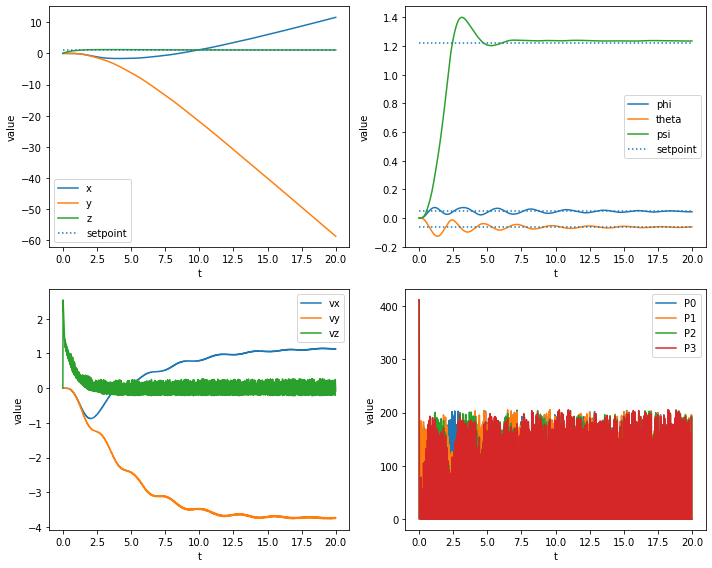

In [11]:
fig, ax = plt.subplots(2,2,figsize=(10,8))
ax = ax.flatten()

sns.lineplot(data=df_long.query("variable in ('x','y','z')"), x='t',y='value',hue='variable',ax=ax[0])
ax[0].hlines(setpoint[3],df.index.min(),df.index.max(),linestyles='dotted',label="setpoint")
ax[0].legend()

sns.lineplot(data=df_long.query("variable in ('phi','theta','psi')"), x='t',y='value',hue='variable',ax=ax[1])
ax[1].hlines(setpoint[:3],df.index.min(),df.index.max(),linestyles='dotted',label="setpoint")
ax[1].legend()

sns.lineplot(data=df_long.query("variable in ('vx','vy','vz')"), x='t',y='value',hue='variable',ax=ax[2])
ax[2].legend()

sns.lineplot(data=df_long.query("variable in ('P0','P1','P2','P3')"), x='t',y='value',hue='variable',ax=ax[3])
ax[3].legend()

fig.tight_layout()

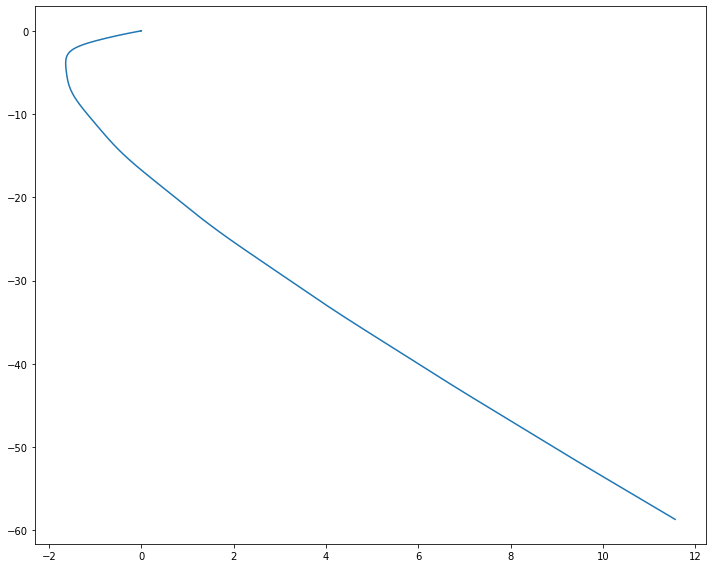

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

ax.plot(df.x,df.y)

fig.tight_layout()